In [1]:
import numpy as np
import pandas as pd

In [7]:
import active_evaluate

/Users/rspeare/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from active_evaluate import active_evaluate
from model_selectors import selectors
from models.sklearn_simple import all_models
from datasets.sklearn_datasets import classification_datasets
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import os

labels_per_epoch = 10

all_datasets = classification_datasets()

#(dataset,model,selector)
experiments = list(itertools.product(
                                    all_datasets.items(),
                                    all_models.items(),
                                    selectors.items()
                                    ))

In [11]:
df = pd.read_csv("../results/all_metrics.csv")
df.head(1)

,Unnamed: 0,accuracy,dataset,f1,logloss,model,n_total_train,selector,test_base_rate,test_positives,test_size,train_base_rate,train_fraction,train_positives,train_size
0,0,0.8,california_housing,0.807692,0.498904,logistic_regression,900,random,0.49,49,100,0.55,0.022222,11,20


In [12]:
%matplotlib inline

In [13]:
import seaborn as sns

In [16]:
df['log_train_fraction'] = np.log(1+df["train_fraction"])

In [20]:
sns.FacetGrid?

In [23]:
df["dataset"].unique()

array(['california_housing', '20newsgroups_vectorized', 'boston'], dtype=object)

In [28]:
df["selector"].unique()

array(['random', 'uncertainty', 'FisherSelector'], dtype=object)

In [31]:
df[(df["dataset"]=='california_housing') & (df["selector"]=='FisherSelector')]

,Unnamed: 0,accuracy,dataset,f1,logloss,model,n_total_train,selector,test_base_rate,test_positives,test_size,train_base_rate,train_fraction,train_positives,train_size,log_train_fraction
200,200,0.74,california_housing,0.682927,0.829886,logistic_regression,900,FisherSelector,0.51,51,100,0.421053,0.021111,8,19,0.020891
201,201,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
202,202,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
203,203,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
204,204,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
205,205,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
206,206,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
207,207,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
208,208,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559
209,209,0.74,california_housing,0.682927,0.828506,logistic_regression,900,FisherSelector,0.51,51,100,0.555556,0.030000,15,27,0.029559


california_housing


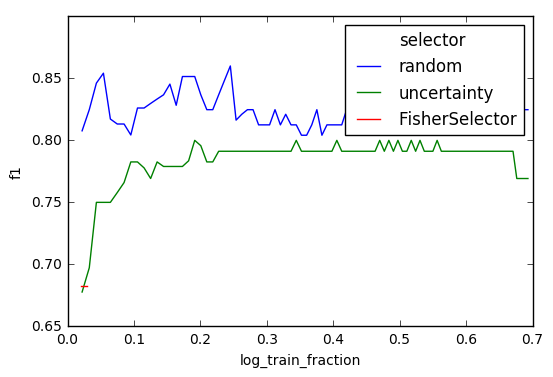

20newsgroups_vectorized


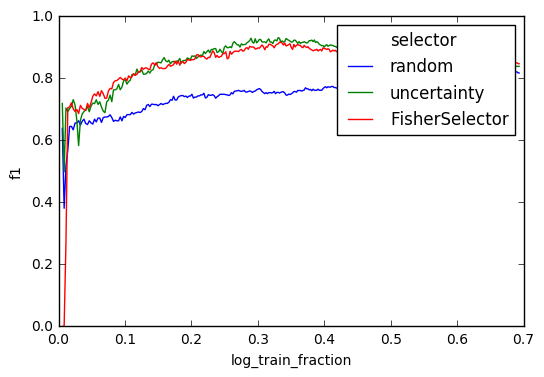

boston


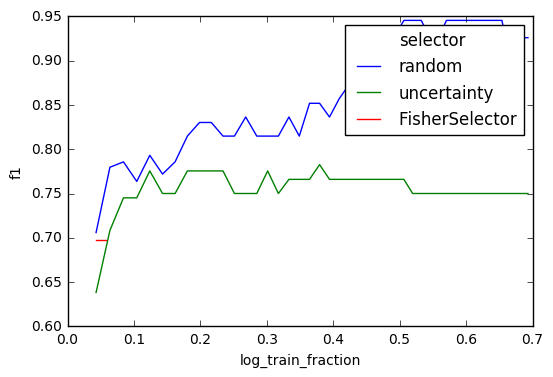

In [25]:
for data in df["dataset"].unique():
    print(data)
    sns.lineplot(x='log_train_fraction', y="f1", data=df[df["dataset"]==data], hue='selector',)
    plt.show()

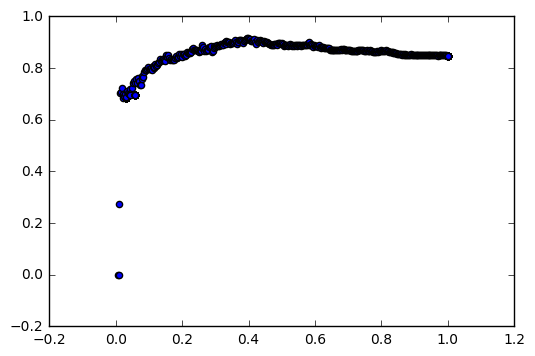

In [32]:
fdf = df[df["selector"]=='FisherSelector']
plt.scatter(fdf["train_fraction"], fdf["f1"],)
plt.show()

In [11]:
X, Y = all_datasets['20newsgroups_vectorized']

In [12]:
selector = selectors["fisher_info"]

In [13]:
model = all_models['logistic_regression']#.keys()

In [14]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
model.decision_function(X[:2])

array([-0.26346046,  0.31006817])

In [19]:
logit(model.predict_proba(X[:2])[:, 1])

array([-0.26346046,  0.31006817])

In [30]:
def active_evaluate(X, Y, model, selector, epochs, labels_per_epoch,test_size=0.1, bootstrap_size=10):
    """

    :param X:
    :param Y:
    :param model:
    :param selector:
    :param epochs:
    :param labels_per_epoch:
    :param test_size:
    :return:
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    selected_ixs = random.sample(set(np.arange(X_train.shape[0])), bootstrap_size) # ordered list of indices we've asked for human labels so far
    model.fit(X_train[selected_ixs], Y_train[selected_ixs])
    metrics_by_epoch = []
    for epoch in range(epochs):
        if epochs <= 20 or epoch % (epochs//20) == 0:
            print('%d/%d epochs...'%(epoch, epochs))
        next_ixs = selector.next_indices(X_train, selected_ixs, Y_train[selected_ixs], model,
                                         n_ixs=labels_per_epoch)
        assert len(set(next_ixs)&set(selected_ixs)) == 0 #must be new indices
        selected_ixs += next_ixs
        # TODO allow for importance weights in model
        model.fit(X_train[selected_ixs], Y_train[selected_ixs])
        P = model.predict_proba(X_test)
        metrics = binary_class_metrics(Y_train[selected_ixs],Y_test,P,len(Y_train))
        metrics_by_epoch.append(metrics)
    return metrics_by_epoch

In [2]:
import sys,os
import numpy as np
import json
import random
import time
from collections import Counter
from sklearn.metrics import average_precision_score, accuracy_score, f1_score, log_loss
from sklearn.cross_validation import train_test_split


/Users/rspeare/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from scipy.special import logit

In [ ]:
model.co

In [6]:
logit(.5)

0.0

In [ ]:
res = active_evaluate(X,Y, model, selector, 1, 1)

0/1 epochs...


In [ ]:
all_metrics = []
for (dataset_name,(X,Y)),(model_name, model),(selector_name, selector) in experiments:
    print('evaluating dataset/model/selector: ',dataset_name,model_name,selector_name,'...')
    #TODO don't hardcode epochs and number of examples per epoch
    epochs = len(Y)//labels_per_epoch
    metrics_by_epoch = active_evaluate(X, Y, model, selector, epochs, labels_per_epoch)
    for metric in metrics_by_epoch:
        metric['dataset'] = dataset_name
        metric['model'] = model_name
        metric['selector'] = selector_name
        all_metrics.append(metric)